<a id="top"></a>
<div style="text-align: center; background: #ff8c00; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">🚀 SMS Spam Classification: Detecting Unwanted Messages 🚀</div>
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*mbFBPcPUJD-53v3h.png">
</div>


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">About Author</p>

**Hi Everyone! Welcome to my notebook.**
<p>Greetings! 👋 I'm absolutely thrilled to welcome you into my world of data science exploration and innovation. My name's <b > Zeeshan Younas <b>, and I'm on a mission to uncover the secrets hidden within datasets. 📊 With a burning passion for data and a knack for machine learning, I'm here to dig deep, extract insights, and make a real impact. 

 I'm super eager to dive into an internship opportunity at Oasis Infobyte! 🌟 It's the perfect chance for me to put my skills to the test and learn from the best in the industry. Let's make magic happen together! ✨ <p>

_____






<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Website</b></th>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Zeeshan5932/project"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/zeeshan-younas-919a09253/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://www.facebook.com/zeeshan.younas.2024?mibextid=ZbWKwL"><img src="https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="mailto:zeeshanoffical01@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>


# Import Libraries

In [56]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
# import porter stemmer
from nltk.stem import PorterStemmer
import string


from bs4 import BeautifulSoup
import nltk
from wordcloud import WordCloud
# Import the necessary machine learning models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  # Assuming you mean MultinomialNB for Naive Bayes
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Import RandomizedSearchCV from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV

# Import QuantileTransformer from sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer

# Import the necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


In [57]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [58]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [59]:
#Rename the columns
df.rename(columns={'v1':'Category','v2':'Masseges'},inplace=True)

In [60]:
df.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Statistical Overview

In [61]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Masseges  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
df.describe()

,Category,Masseges
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Text(0.5, 1.0, 'Distrubution of Category')

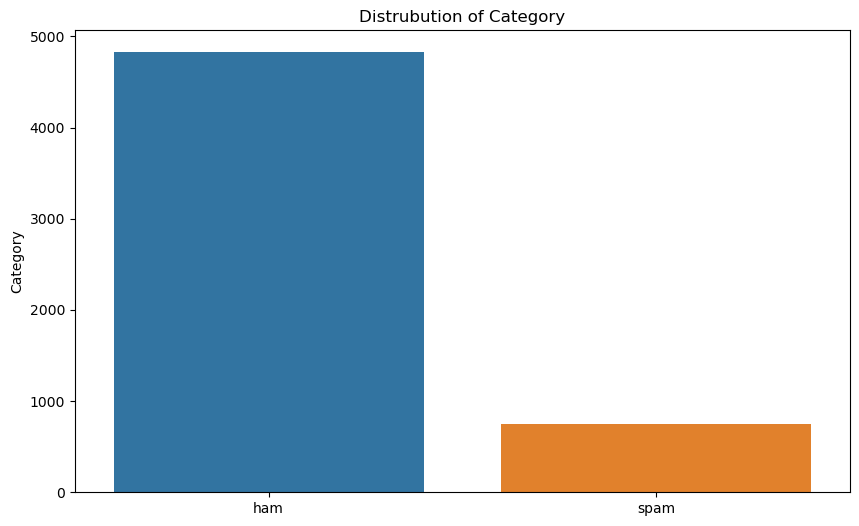

In [63]:
# Make bar plot on category column

cat = df['Category'].value_counts()

# Make plot  distrubution plot
plt.figure(figsize=(10,6))
sns.barplot(x=cat.index, y=cat)
plt.title("Distrubution of Category")

# Deal with missing values

In [64]:
# check null values
df.isnull().sum().sort_values(ascending=False)

Category    0
Masseges    0
dtype: int64

In [65]:
# Remove duplicates values
df.drop_duplicates(inplace=True)

# Pre-processing

## Text to lower case

In [66]:
# Remove text to lower case 
df['Masseges'] = df['Masseges'].str.lower()

In [67]:
df.head()

,Category,Masseges
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


## Remove punctation

In [68]:
# define a function to remove punctuation
df['Masseges'] = df['Masseges'].str.translate(str.maketrans('', '', string.punctuation))


## Remove HTML tags

In [69]:
# Remove html tags
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Apply the function to 'Massege' Column
df['Masseges'] = df['Masseges'].apply(remove_html)


# Remove Extra white space

In [70]:
# Remove extra white space
df['Masseges'] = df['Masseges'].str.strip()

# Remove Non-Alpha Numeric Values

In [71]:
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)


# Apply to 'Massege' Column
df['Masseges'] = df['Masseges'].apply(remove_non_alphanumeric)

# Remove Special character

In [72]:
# Function to remove special characters
def remove_special_characters(text):
    # Replace all special characters (non-alphanumeric and non-whitespace) with an empty string
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

# Apply to 'Massege' Column
df['Masseges'] = df['Masseges'].apply(remove_special_characters)


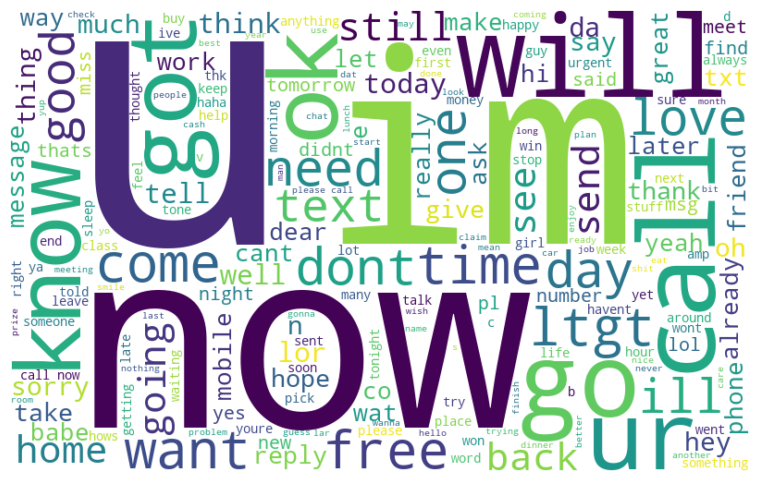

In [73]:
# check wordcloud
text=' '.join(df['Masseges'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

In [75]:
# Encode Category column 
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Masseges
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


# Remove Stop Words

In [76]:
# Download the stopwords resource
nltk.download('stopwords')
# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))


# Define function to remove stopwords
def remove_stopwords(text):
    # Split the text into words
    words = text.split()
    filter_words = [word for word in words if word.lower() not in stop_words]
    
    return ' ' .join(filter_words)

# Apply to 'Massege' Column
df['Masseges'] = df['Masseges'].apply(remove_stopwords)


df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Masseges
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [77]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Masseges'] = df['Masseges'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Remove Numerical values

In [78]:
# Function to remove numerical values from text
def remove_numerical_values(text):
    # Replace all numerical values with an empty string
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text


# Apply to 'Massege' Column
df['Masseges'] = df['Masseges'].apply(remove_numerical_values)

# Stemming

In [79]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Masseges'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

# Model building

In [80]:
# Intlize CountVectorizer
cv = CountVectorizer()

# Fitting CountVectorizer on X 
X = cv.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [83]:
#create models
bc = BaggingClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state=42)
svc = SVC(kernel="sigmoid", gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=10)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)


models = {
    'BGC': bc,
    'GBDT': gbdt,
    'xgb': xgb,
    'SVC': svc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc
}

def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [84]:
%%time

accuracy_scores = []
precision_scores = []

# Iterate over the items in the clfs dictionary
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, y_train, X_test, y_test)
    rounded_accuracy = round(current_accuracy, 2)
    rounded_precision = round(current_precision, 2)
    
    print()
    print("For: ", name)
    print("Accuracy: ", rounded_accuracy)
    print("Precision: ", rounded_precision)

    accuracy_scores.append(rounded_accuracy)
    precision_scores.append(rounded_precision)

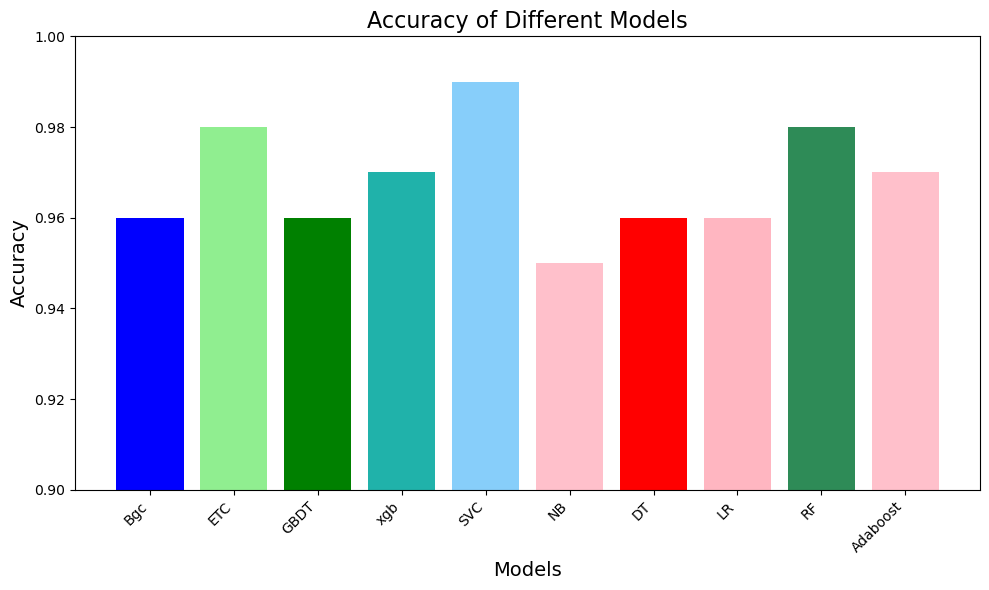

In [ ]:
# Model names
models = ['Bgc', 'ETC', 'GBDT', 'xgb', 'SVC', 'NB', 'DT', 'LR', 'RF', 'Adaboost']

# Accuracy scores for each model
accuracy_scores = [0.96, 0.98, 0.96, 0.97, 0.99, 0.95, 0.96, 0.96, 0.98, 0.97]

# Define lighter tint colors for each model
color = ['blue', 'lightgreen', 'Green', 'lightseagreen',
                 'lightskyblue', 'pink', 'Red', 'lightpink', 'seagreen', 'pink']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=color)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Different Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1)  # Set the y-axis limits for better visualization
plt.tight_layout()
plt.show()

In [ ]:
#create a new model with pipeline
NB1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [ ]:
spm.score(X_test,y_test)

NameError: name 'spm' is not defined